<a href="https://colab.research.google.com/github/vujjiniashrith/ESS-profit-maximaization-using-deep-Reinforcemetn-Learning/blob/main/DQN_openai_gym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gym
import random


In [ ]:
from gym import Env
from gym import spaces
from gym.spaces import Discrete, Box


In [ ]:
data_elec = pd.read_csv("electicity_data_hourly.csv")
data_cons = pd.read_csv("consumer_data_hourly.csv")

In [ ]:
print(data_elec.columns)

Index(['datetime', 'system_energy_price_da'], dtype='object')


In [ ]:
print(data_cons.columns)

Index(['dateTime', 'use'], dtype='object')


In [ ]:
data_elec.head(5)

,datetime,system_energy_price_da
0,2022-01-01 00:00:00,21.02
1,2022-01-01 01:00:00,18.43
2,2022-01-01 02:00:00,18.11
3,2022-01-01 03:00:00,18.15
4,2022-01-01 04:00:00,17.70


In [ ]:
data_elec.rename(columns={'system_energy_price_da':'price'},inplace = True)

In [ ]:
data_cons.rename(columns={'use':'usage'},inplace = True)

In [ ]:
data_cons.head()

,dateTime,usage
0,2016-01-01 00:00:00,2.108533
1,2016-01-01 01:00:00,1.852600
2,2016-01-01 02:00:00,1.988000
3,2016-01-01 03:00:00,1.993267
4,2016-01-01 04:00:00,1.781533


In [ ]:
print(data_cons.usage.max()," ",data_cons.usage.min())
print(data_elec.price.max()," ",data_elec.price.min())

29.8692   0.0
455.3   13.74


In [ ]:
print(data_cons.usage.median(), " ", data_cons.usage.mean())

3.519333333333332   5.361010481177894


In [ ]:
data_elec.shape

(8737, 2)

In [ ]:
data_cons.shape

(8784, 2)

In [ ]:
split_point = 7027
train_elec = data_elec[:split_point]
train_cons = data_cons[:split_point]
test_elec = data_elec[split_point:]
test_cons = data_cons[split_point:]
print(train_elec.shape, test_elec.shape)
print(train_cons.shape, test_cons.shape)

(7027, 2) (1710, 2)
(7027, 2) (1757, 2)


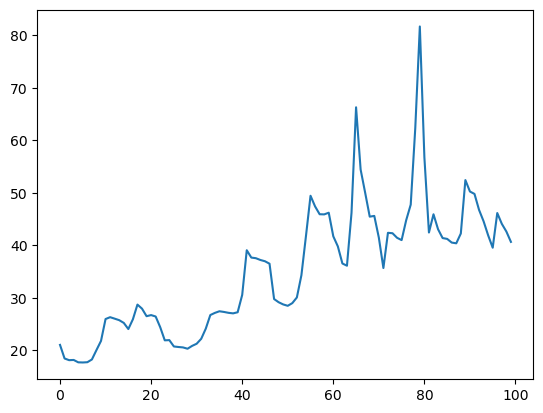

In [ ]:
plt.plot(data_elec.price[:100])

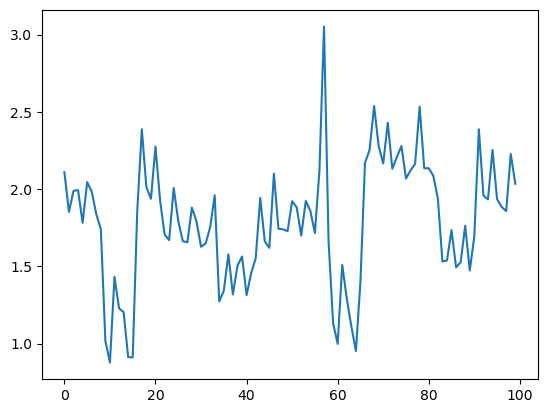

In [ ]:
plt.plot(data_cons.usage[0:100])

In [ ]:
data_usage = data_cons['usage'].values

In [ ]:
data_price = data_elec['price'].values

# Create Custom Environment of SmartGrid

In [ ]:
class SmartGrid(Env):
    def __init__(self,data_usage,data_price):
        #load electricity price data

        self.data_price = data_price

        #load consumer price data
        self.data_usage = data_usage

        #set maximum battery capacity
        self.max_capacity = 10

        #Actions that we can take
        #0 == -3, 1 == -2, 2 == -1, 3 ==0 , 4 == 1, 5 == 2, 6== 3 total 7 actions to take
        #-ve values stand for discharge and positive values stand for charge
        self.action_space = Discrete(7)

        #state
        self.observation_space = Box(low=np.array([0]), high=np.array([100]))

        #set initial start state
        self.state = 0

        #set initial position
        self.time_step = 0

        #initiate profits
        self.profits =0





    def step(self,action):
        reward=0
        self.state += action -3
        self.time_step+=1

        #calculate reward
        reward = -(action-3)*self.data_price[self.time_step]

        if self.time_step>5:
            done = True
        else:
            done = False

        info = {}

        return self.state, reward, done, info



    def render(self):
        #implement vizualization
        pass
    def reset(self):
        #reset the initial timestamp
        self.time_step =0
        #empty the entire battery
        self.state = 0
        #set done state as false

        return self.state



In [ ]:
env = SmartGrid(data_usage,data_price)

C:\Users\vujji\anaconda3\lib\site-packages\gym\spaces\box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [ ]:
env.observation_space.sample()

array([0.9994507], dtype=float32)

In [ ]:
print(env.observation_space.shape)

(1,)


In [ ]:
episodes = 10
for episode in range(1,episodes+1):
    state = env.reset()
    done = False
    score = 0

    while not done:

        action = env.action_space.sample()
        n_state , reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode,score))

Episode:1 Score:72.38
Episode:2 Score:72.19999999999999
Episode:3 Score:35.67
Episode:4 Score:-90.99000000000001
Episode:5 Score:34.910000000000004
Episode:6 Score:126.1
Episode:7 Score:37.139999999999986
Episode:8 Score:-123.12
Episode:9 Score:-142.32999999999998
Episode:10 Score:51.76


# Creating Deep Learning Model with Keras

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
states = env.observation_space.shape
actions = env.action_space.n

In [ ]:
del model

In [ ]:
print(states)
print(actions)

(1,)
7


In [ ]:
def build_model(states, actions):
    model = Sequential()

    model.add(Dense(24, activation='relu', input_shape=(1,)))  # Use input_shape as a tuple with a single integer
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [ ]:
model = build_model(states, actions)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 24)                48        
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 7)                 175       
                                                                 
Total params: 823
Trainable params: 823
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [ ]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [ ]:
dqn = build_agent(model, actions)
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 11:30 - reward: 18.4300

C:\Users\vujji\anaconda3\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
C:\Users\vujji\anaconda3\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
C:\Users\vujji\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 11 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)


   30/10000 [..............................] - ETA: 3:45 - reward: 8.2950 

C:\Users\vujji\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 12 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\vujji\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 13 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\vujji\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 14 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\vujji\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 15 + 1) instead
  batch_idxs = np.random.random_integers(low, high - 1, size=size)
C:\Users\vujji\anaconda3\lib\site-packages\rl\memory.py:38: DeprecationWarning: This function is deprecated. Please call randint(1, 16 + 1) 

10000/10000 [==============================] - 85s 8ms/step - reward: 49.6159
1666 episodes - episode_reward: 297.684 [-107.780, 323.340] - loss: 266.308 - mae: 122.692 - mean_q: 180.207

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 87s 9ms/step - reward: 51.4960
1667 episodes - episode_reward: 308.989 [268.650, 323.340] - loss: 75.873 - mae: 127.297 - mean_q: 182.704

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 89s 9ms/step - reward: 51.6734
1667 episodes - episode_reward: 310.033 [18.310, 323.340] - loss: 52.414 - mae: 131.133 - mean_q: 181.861

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 90s 9ms/step - reward: 51.9043
1666 episodes - episode_reward: 311.420 [250.540, 323.340] - loss: 43.093 - mae: 132.918 - mean_q: 181.923

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 92s 9ms/step - reward: 51.5685
done, took 443.421 seconds


In [ ]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: 323.340, steps: 6
Episode 2: reward: 323.340, steps: 6
Episode 3: reward: 323.340, steps: 6
Episode 4: reward: 323.340, steps: 6
Episode 5: reward: 323.340, steps: 6
Episode 6: reward: 323.340, steps: 6
Episode 7: reward: 323.340, steps: 6
Episode 8: reward: 323.340, steps: 6
Episode 9: reward: 323.340, steps: 6
Episode 10: reward: 323.340, steps: 6
Episode 11: reward: 323.340, steps: 6
Episode 12: reward: 323.340, steps: 6
Episode 13: reward: 323.340, steps: 6
Episode 14: reward: 323.340, steps: 6
Episode 15: reward: 323.340, steps: 6
Episode 16: reward: 323.340, steps: 6
Episode 17: reward: 323.340, steps: 6
Episode 18: reward: 323.340, steps: 6
Episode 19: reward: 323.340, steps: 6
Episode 20: reward: 323.340, steps: 6
Episode 21: reward: 323.340, steps: 6
Episode 22: reward: 323.340, steps: 6
Episode 23: reward: 323.340, steps: 6
Episode 24: reward: 323.340, steps: 6
Episode 25: reward: 323.340, steps: 6
Episode 26: reward: 323.340, s